<a href="https://colab.research.google.com/github/Deep-Learning-in-Multimedia/jupyter-notebook-Niick95/blob/master/Niklas_Holtz_Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Deep Dream

by Niklas Holtz
 
 

# 1. Introduction

This project is part of the course "Deep Learning in Multimedia" at the Carl von Ossietzky University Oldenburg Germany, summer term 2020. In this course we were assigned various topics that should provide us with in-depth content about deep learning. This elaboration is the result of my topic: *Deep Dream*. The code can be executed directly in Colab, but you should not train your own model within chapter 2.1, as this is very time-consuming. The book "*Deep Learning with Python*" by Francois Chollet was chosen as the basis for this project, since a similar project has already been implemented there.


 



## 1.1 What is Deep Dream?
 
DeepDream is software that is based on *artificial neural networks* and was first developed and published by Google employee Alexander Mordvintsev. *Convolutional Neural Networks (**CNN**)* are used, which are actually used to recognize and classify content. However, it is used here to insert structures in the image that look similar to those of the trained neural network. To do this, the network basically runs backwards, so that the image is processed further and further until a desired input is recognized. The reversal procedure is never perfectly clear, as it uses a one-to-many mapping process. The images that arise after enough iterations often remind of dream structures, which is why this algorithm got its name. 

Here you can see a painting that was expanded by a CNN with different structures. The CNN was trained to detect birds. As can be seen, structures from the network were added at many corners and edges.
![A "deep dream" picture with a network trained on birds.](https://b2h3x3f6.stackpathcdn.com/assets/landing/img/gallery/4.jpg)
This image was generated by https://deepdreamgenerator.com

## 1.2 How it works

The *Deep Dream* is based on CNNs that have already been trained using sample images so that they can correctly recognize the objects mapped in their data set. Instead of recognizing the object of the input image, the CNN is used to change the image through selected layers.

### What is a CNN?

A CNN consists of several *convolutional layers*, followed by a *pooling layer*. This combination can be repeated any number of times, which is why this is also known as **deep learning**. Small filter matrices are pushed over the image in the convolution layer. The pooling layer then filters unnecessary information and reduces the image. Finally, there is usually a fully connected layer that classifies the recognized objects.

Different matrices are created for each layer of the image, which reflect the neuronal activity. The deeper a layer is, the more special the matrices are. Upper layers therefore mostly contain only vague structures, while lower layers can already contain parts that are recognizable to humans.


![CNN Overview](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)
This image was taken from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

![Deep Visualization](https://www.mdpi.com/electronics/electronics-08-00105/article_deploy/html/images/electronics-08-00105-g001.png)
This image was taken from https://www.mdpi.com/


### Using CNNs to extend images

The algorithm changes the input image until the CNN can recognize the image based on it's data set. During the expansion, different layers of the CNN can be selectively increased in order to obtain different results. In the following picture the algorithm with prioritization of upper layers was applied. As a result, various rough structures were inserted into the input image.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Deep_Dream_of_Electric_Sheep.jpg/330px-Deep_Dream_of_Electric_Sheep.jpg)

This image was taken from https://www.wikipedia.org/

## 1.3 Oneirology and Pareidolia

Todo

## 1.4 Motivation and benefits

The potential of what neural networks offer is considerable. But the deeper a network is, the more difficult it is to understand how the learning process works. **Deep visualization** is an important tool for debugging and optimizing models. Various methods are used to visualize, for example, the intermediate activations of the individual layers. The use of *Deep Dream* offers the possibility of appropriately visualizing the activation of the neurons of different layers in order to further optimize the network.

On the other hand, the *Deep Dream* algorithm also has an artistic aspect, since mostly very individual and abstract images are created. Since the code published by Google is freely accessible to everyone, there are many imitators who apply the algorithm or even refine it and finally upload their pictures to social networks tagging them with [#deepdream](https://twitter.com/hashtag/deepdream).

## 1.5 Goals / Milestones

1.   **Train a CNN**. First of all, a trained CNN is required, which can already recognize objects of the data set. Input images from existing data sets should be used. Known data sets are, for example, NIST, Imagenet or MIRFLICKR.
2.   **Evaluate and Optimize a CNN**. The trained network should then be evaluated in order to master typical machine learning problems such as overfitting.
3.   **Implement the Deep Dream**. The deep dream algorithm is then to be implemented on the basis of the trained CNN. Keras is to be used as a deep learning library.
4.   **Generate aesthetic images**. As soon as the algorithm is implemented, it should be tested using various images. The aim is to experiment with the various parameters in order to generate aesthetically pleasing images.



# 2. Implementation

Now you have a basic idea about the topic of this study. This chapter will give you an introduction in creating your own network model. After classic problems like overfitting have been solved, the created model should be evaluated and visualized in order to gain a deeper insight. Finally, the deep dream algorithm is explained to you and executed on the basis of the model created. As a result of that various sample images will be created which will be considered further in the following chapter.

## 2.1 Creating a Model from Scratch

In order to create the simplest possible model, data is downloaded from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). The dataset contains 2000 JPG pictures of dogs and cats. It consits of a `train` and a `validation` subdirectories for the training and validation datasets. Both are extracted to the the local directory `/tmp/cats_and_dogs_filtered`.

In the following code you can see how the data is downloaded, extracted and stored in the subdirectory. The variables that are declared here are important for the rest of this chapter. So this code should always be run before running the other blocks in this chapter.





In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

# Download the zip file, unzip it and save it locally in /tmp
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

tmp_tip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(tmp_tip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# This is the base directory
base_dir = '/tmp/cats_and_dogs_filtered'
# The subdirectory for training
train_dir = os.path.join(base_dir, 'train')
# The subdirectory for validation
validation_dir = os.path.join(base_dir, 'validation')

# Now the training and validation pictures of dogs and cats are saved individually
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_file_names = os.listdir(train_cats_dir)
train_dog_file_names = os.listdir(train_dogs_dir)
  
# In order to have an overview of how much data has been loaded in total, the number of elements within each folder is outputted here.
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


--2020-06-17 14:51:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   111MB/s    in 0.6s    

2020-06-17 14:51:26 (111 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


---
The following method was only implemented to get a first impression of what the data looks like. Of course, this is no longer necessary for creating the model, but it is a good way to get a feel for the network. To get more or less output, you can change the parameters of the method (rows and cols) as you like.

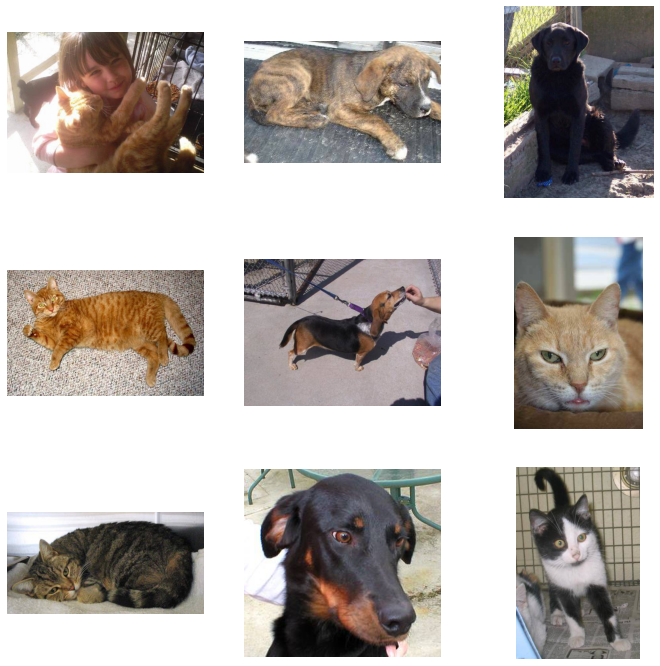

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_dataset(rows=4, cols=4):
  fig = plt.gcf()
  # size of the images
  fig.set_size_inches(rows * 4, cols * 4)
  cntr = 0
  
  total_count = rows * cols
  # cat,  dog and all pictures
  cat_pics = [os.path.join(train_cats_dir, file_name) for file_name in train_cat_file_names]
  dog_pics= [os.path.join(train_dogs_dir, file_name) for file_name in train_dog_file_names]
  all_pics = cat_pics + dog_pics

  while cntr < (rows * cols):
    # just picking a random one
    pic = random.choice(all_pics)
    pic_path = os.path.abspath(pic)
    plots = plt.subplot(rows, cols, cntr + 1)
    # hide the axis
    plots.axis('off')
    pic_data = mpimg.imread(pic_path)
    plt.imshow(pic_data)
    cntr += 1
  plt.show()

# change the parameters if you like
plot_dataset(rows=3, cols=3)





---
The architecture of the CNN is now determined at this point. The classic CNN architecture usually consists of several convolution layers, pooling layers and one or more fully connected layers. After researching and comparing with other neural networks, I decided to use **four** convolution layers. The filter size of them is continuously increasing from 16 up to 128. In addition, the use the ReLU activation function (rectified linear unit). 

See the keras documentation for additional information about activation functions: https://keras.io/api/layers/activations/

The pooling layers will use simple MaxPooling2D. Take a look a at the following link for more information. https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In order to process the images, it is also necessary to determine a final size of the input data. I chose 150x150 here.

Finally, two fully connected are added, which will later classify the two animal species. The first layer will use a ReLU activation function with 512 hidden units. The second layer, on the other hand, uses a sigmoid activation to generate a scalar between 0 and 1.

In theory, these layers are not absolutely necessary for the later deep dream algorithm, but the CNN must first be trained and validated.

> **Addition after first results:** As the first results of this network showed strong overfitting, a dropout layer was added. Simply put, dropout refers to ignoring units (neurons) during the training phase of certain set of neurons which is chosen at random.







In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Input feature map with a size of 150x150 and three different channels (R, G, B)
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Two Fully-connected layers:

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# First fully-connected layer with a ReLU activation function
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Second fully-connected layer with a sigmoid activation function
output = layers.Dense(1, activation='sigmoid')(x)

# Create model and print its structure to the console
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

---
Now that the model has been created, it's time to **compile** and **configure** it. As a loss function, I use `binary_crossentropy` because it works well for multi-label classification. The loss tells us how wrong the model's predictions are. There are many more loss functions in the [keras documentation](https://keras.io/api/losses/).

I use  [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) as an optimizer because it adapts the learning rate automatically and has already proven itself in many other implementations. Alternatives would be [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) or [Adagrad](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad), for example, since these also adjust the learning rate.




In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

---
*Data Preprocessing*

The data must now be prepared so that the model can be trained in the next step.

> **Addition after first results:** Because of strong overfitting, the concept of *data augmentation* was used here. Since there is relatively little training data, it is artificially augmented here. To do this, random transformations are applied to the data so that the model does never see the exact same picture twice during the training phase. The  ```ImageDataGenerator``` offers the possibility to apply different random transformations to the training set. You can see these in a self-explanatory manner in the following code section.


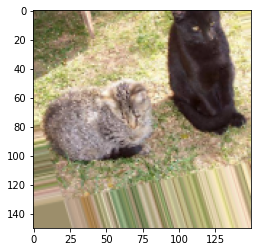

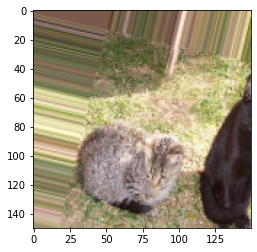

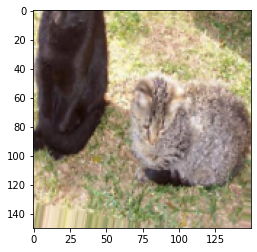

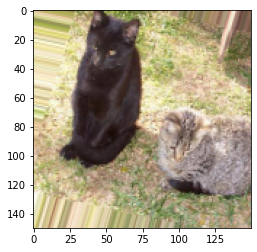

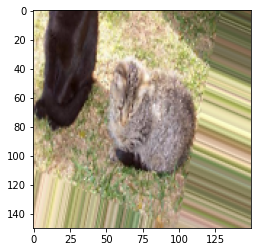

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_file_names[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The actual work is done by the flow method, since it generates the randomly transformed images.
# For illustration purposes, some images are also output directly here.
max_pics = 10
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i >= max_pics:
    break


In order to train the neural network, two generators must be created that insert the images into the network as tensors with their labels. A generator for training and one for validation must be implemented. In addition, the pixel values of the images must be normalized to a [0, 1] range in order to make the network value as accessible as possible.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # The images will have a size of 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


----
*Training*

Finally, the network must be trained. It is now trained on the basis of 2000 images and validated on the basis of 1000 images. To get a good result, the network is trained for 15 epochs.

**Warning! The execution of this training in the browser will take a few minutes of processing time.**


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 - 63s - loss: 0.6989 - acc: 0.5030 - val_loss: 0.6885 - val_acc: 0.5090
Epoch 2/30
100/100 - 63s - loss: 0.6937 - acc: 0.5025 - val_loss: 0.6921 - val_acc: 0.5070
Epoch 3/30
100/100 - 63s - loss: 0.6921 - acc: 0.5275 - val_loss: 0.6783 - val_acc: 0.5970
Epoch 4/30
100/100 - 63s - loss: 0.6821 - acc: 0.5595 - val_loss: 0.6548 - val_acc: 0.6330
Epoch 5/30
100/100 - 67s - loss: 0.6723 - acc: 0.5905 - val_loss: 0.6456 - val_acc: 0.6310
Epoch 6/30
100/100 - 62s - loss: 0.6741 - acc: 0.5585 - val_loss: 0.6703 - val_acc: 0.5920
Epoch 7/30
100/100 - 62s - loss: 0.6648 - acc: 0.6040 - val_loss: 0.6468 - val_acc: 0.6170
Epoch 8/30
100/100 - 62s - loss: 0.6619 - acc: 0.6105 - val_loss: 0.6293 - val_acc: 0.6650
Epoch 9/30
100/100 - 62s - loss: 0.6578 - acc: 0.6170 - val_loss: 0.6320 - val_acc: 0.6150
Epoch 10/30
100/100 - 62s - loss: 0.6407 - acc: 0.6350 - val_loss: 0.6049 - val_acc: 0.6730
Epoch 11/30
1

Save the model  so that it can be reloaded later.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model_name = "cat_dog_model_1_no_overfitting.h5"
model.save("/content/gdrive/My Drive/" + model_name)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2.2 Visualization and evaluation

The model is now trained and saved and therefore ready to be examined in more detail. First, the intermediate representations should be visualized in order to gain an impression of the network. Then the network should be evaluated by showing the accuracy and the failure in graphs.

Visualizing Intermediate Reprenstations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


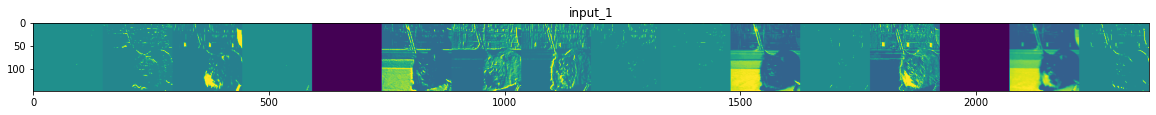

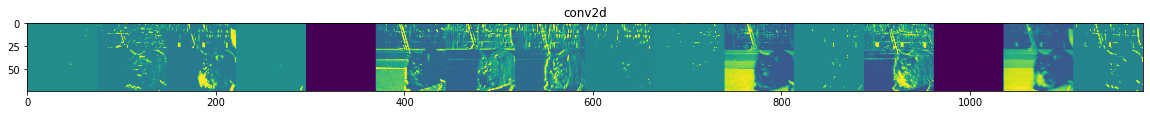

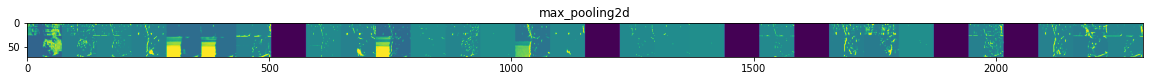

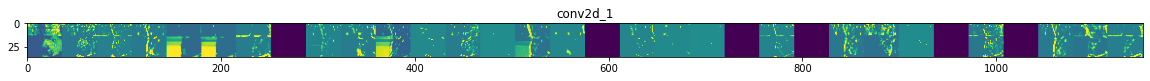

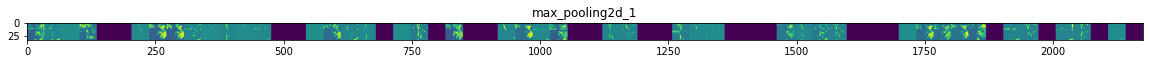

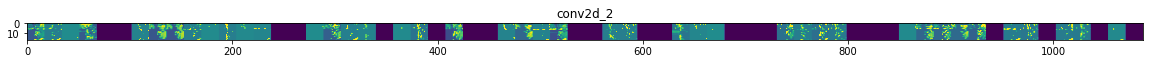

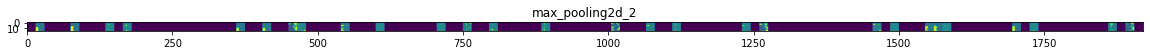

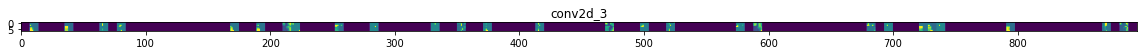

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_file_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_file_names]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Evaluating Accuracy and Luss for the Model

Text(0.5, 1.0, 'Training and validation loss')

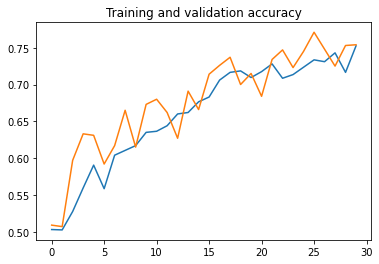

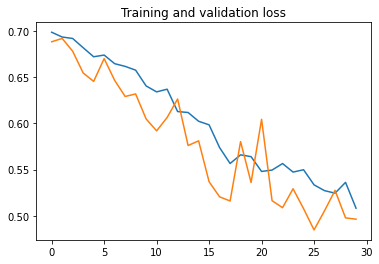

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As can be seen, the model achieves an accuracy of almost 100% (in blue), while the validation accuracy stalls as 70%. This is a classic problem in machine learning and is known as **overfitting**. This shouldn't be a problem for now, however, because the network is adequately trained to use the deep dream algorithm.

## 2.3 Deep Dream


This part now assumes that a model has been successfully created and that the deep dream algorithm can be applied. In this sense, it is explained and visualized step by step. Since the process of creating a model takes a lot of time each time, the finished model is saved in my private Google Drive and loaded in the following code. [Here](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb) you can see a tutorial that I've used for saving and loading models using colab and google drive.

In [ ]:
model_name = "cat_dog_model_1_no_overfitting.h5"
model = tf.keras.models.load_model("/content/gdrive/My Drive/" + model_name)
# Let's print the architecture of the model
model.summary()
print("Model loaded.")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In short:

* Load the original image.
* Define a number of processing scales (i.e. image shapes), from smallest to largest.
* Resize the original image to the smallest scale.
* For every scale, starting with the smallest (i.e. current one):
** Run gradient ascent
** Upscale image to the next scale
** Reinject the detail that was lost at upscaling time
* Stop when we are back to the original size.




Lets print out the Feature maps (Activation Maps)
[Source](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [ ]:
from matplotlib import pyplot
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv2d (None, 148, 148, 16)
3 conv2d_1 (None, 72, 72, 32)
5 conv2d_2 (None, 34, 34, 64)
7 conv2d_3 (None, 15, 15, 128)


Using TensorFlow backend.


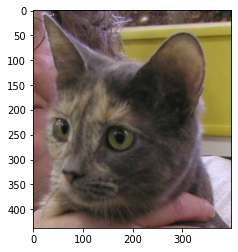

0.24476326070725918


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential

# Load the pictures and choose a random one
cat_pics = [os.path.join(train_cats_dir, file_name) for file_name in train_cat_file_names]
dog_pics= [os.path.join(train_dogs_dir, file_name) for file_name in train_dog_file_names]
pics = dog_pics + cat_pics
img_path = random.choice(pics)
img = load_img(img_path, target_size=(150, 150))

# Print the picture
pic_path = os.path.abspath(img_path)
pic_data = mpimg.imread(pic_path)
plt.imshow(pic_data)
plt.show()

# Transfer the image to a numpy array
np_img = img_to_array(img) # (150, 150, 3)
np_img = np_img.reshape((1,) + np_img.shape) # (1, 150, 150, 3)
np_img /= 255 # Rescale by 1/255

# Predict a random image
prediction  = model.predict(np_img)
print(100 * np.max(prediction))




Util functions..

{'input_1': <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f40063a7518>, 'conv2d': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ff8142be0>, 'max_pooling2d': <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ff8142a90>, 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ff8142e10>, 'max_pooling2d_1': <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ff81420b8>, 'conv2d_2': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ff818aeb8>, 'max_pooling2d_2': <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ff818ab38>, 'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ff818a9e8>, 'max_pooling2d_3': <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ff818a748>, 'flatten': <tensorflow.python.keras.layers.core.Flatten object at 0x7f3ff818a4e0>, 'dense': <tensorflow.python.keras.layers.core.Dense object at 0

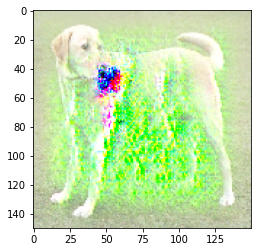

In [ ]:
import os

import numpy as np
import scipy
from IPython.display import Image

from keras.preprocessing.image import load_img, img_to_array, save_img
from keras.applications import inception_v3
from keras.utils import plot_model
import keras.backend as K

#model = inception_v3.InceptionV3(weights='imagenet', include_top=False)


def preprocess_image(img_path, x_size = 150, y_size = 150):
    img = load_img(img_path, target_size=(x_size, y_size))
    # Transfer the iamge to a numpy array
    np_img = img_to_array(img) # (150, 150, 3)
    np_img = np_img.reshape((1,) +np_img.shape) # (1, 150, 150, 3)
    np_img /= 255 # Rescale by 1/255
    return np_img


def deprocess_image(img):
    img = np.copy(img)
    img = img.reshape((img.shape[1], img.shape[2], 3))
    img /= 2
    img += 0.5
    img *= 255
    img = np.clip(img, 0, 255).astype('uint8')
    return img


def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

settings = {
    'features': {
        'conv2d': 0.2,
        'conv2d_1': 0.5,
        'conv2d_2': 1.,
        'conv2d_3': 0.5,
    },
}

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    if layer_name not in layer_dict:
        raise ValueError('Layer ' + layer_name + ' not found in model.')
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        loss = loss + coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
    else:
        loss = loss + coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

print(loss)

dream = model.input
grads = K.gradients(loss, dream)[0]
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon())

fetch_loss_grads = K.function([dream], [loss, grads])

def eval_loss_grads(x):
    loss_value, grad_values = fetch_loss_grads([x])
    return loss_value, grad_values

def gradient_ascent(img, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value , grad_values = eval_loss_grads(img)
        print(f'iter {i}, loss_value {loss_value}')
        if max_loss is not None and loss_value > max_loss:
            break
        img += step * grad_values
    return img

# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 10.

img_name = "dog.png"
path ="/content/gdrive/My Drive/"
img = preprocess_image(path + img_name)

original_shape = img.shape[1:-1]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale**i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes.reverse()
original_img = np.copy(img)
shrunk_original_img = resize_img(original_img, successive_shapes[0])
print(shrunk_original_img.shape, original_img.shape)

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

#save_img(result_prefix + '.png', deprocess_image(np.copy(img)))

result_img = deprocess_image(img)
plt.imshow(result_img)
plt.show()